In [1]:
from models import KMeans
import pandas as pd
from models.metrics import Metric, Average, silhouette_score
from models.model_selection import train_test_split, evaluate, plot_silhouette_scores, PlotType, plot
from typing import get_args
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

# Load data

In [2]:
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [4]:
from models import preprocessing

X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)
X

                N           P           K          pH          EC          OC  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean   250.166795    8.893743  498.353545    7.473827    0.544188    0.591219   
std     72.293371    2.951544  118.450293    0.213522    0.140689    0.296291   
min     50.000000    2.900000  222.000000    7.000000    0.200000    0.100000   
25%    201.000000    6.800000  412.000000    7.350000    0.430000    0.380000   
50%    257.000000    8.100000  475.000000    7.500000    0.546842    0.590000   
75%    307.000000   10.700000  578.250000    7.600000    0.640000    0.780000   
max    383.000000   16.000000  834.000000    7.960000    0.950000    1.270000   

                S          Zn          Fe          Cu          Mn           B  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean     6.673031    0.377294    4.059498    0.950096    8.434112    0.413222   
std      2.372884    0.1191

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,0.264264,0.435115,0.552288,0.479167,0.560000,0.512821,0.422151,0.250000,0.009671,0.338308,0.462366,0.056818,0.512821
1,0.489489,0.351145,0.189542,0.645833,0.733333,0.820513,0.553960,0.338235,0.062863,0.721393,0.149462,0.601719,0.820513
2,0.339339,0.511450,0.810458,0.614583,0.413333,0.863248,0.493747,0.338235,0.062863,0.736318,0.139247,0.601719,0.863248
3,0.321321,0.297710,0.413399,0.666667,0.506667,0.717949,0.553960,0.397059,0.031915,0.716418,0.136559,0.601719,0.717949
4,0.660661,0.534351,0.362745,0.656250,0.266667,0.649573,0.895666,0.264706,0.053191,0.796020,0.124731,0.601719,0.649573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.903904,0.595420,0.655229,1.000000,0.413333,0.162393,0.529695,0.426471,0.433269,0.298507,0.587097,0.715909,0.162393
879,0.642643,0.465649,0.431373,0.250000,0.360000,0.000000,0.263242,0.411765,0.778530,0.179104,0.423118,0.386364,0.000000
880,0.678679,0.480916,0.241830,0.645833,0.560000,0.333333,0.481541,0.514706,0.324952,0.268657,0.342473,0.295455,0.333333
881,0.810811,0.832061,0.276144,0.395833,0.600000,0.829060,0.384430,0.750000,0.422631,0.462687,0.706452,0.534091,0.829060


In [5]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

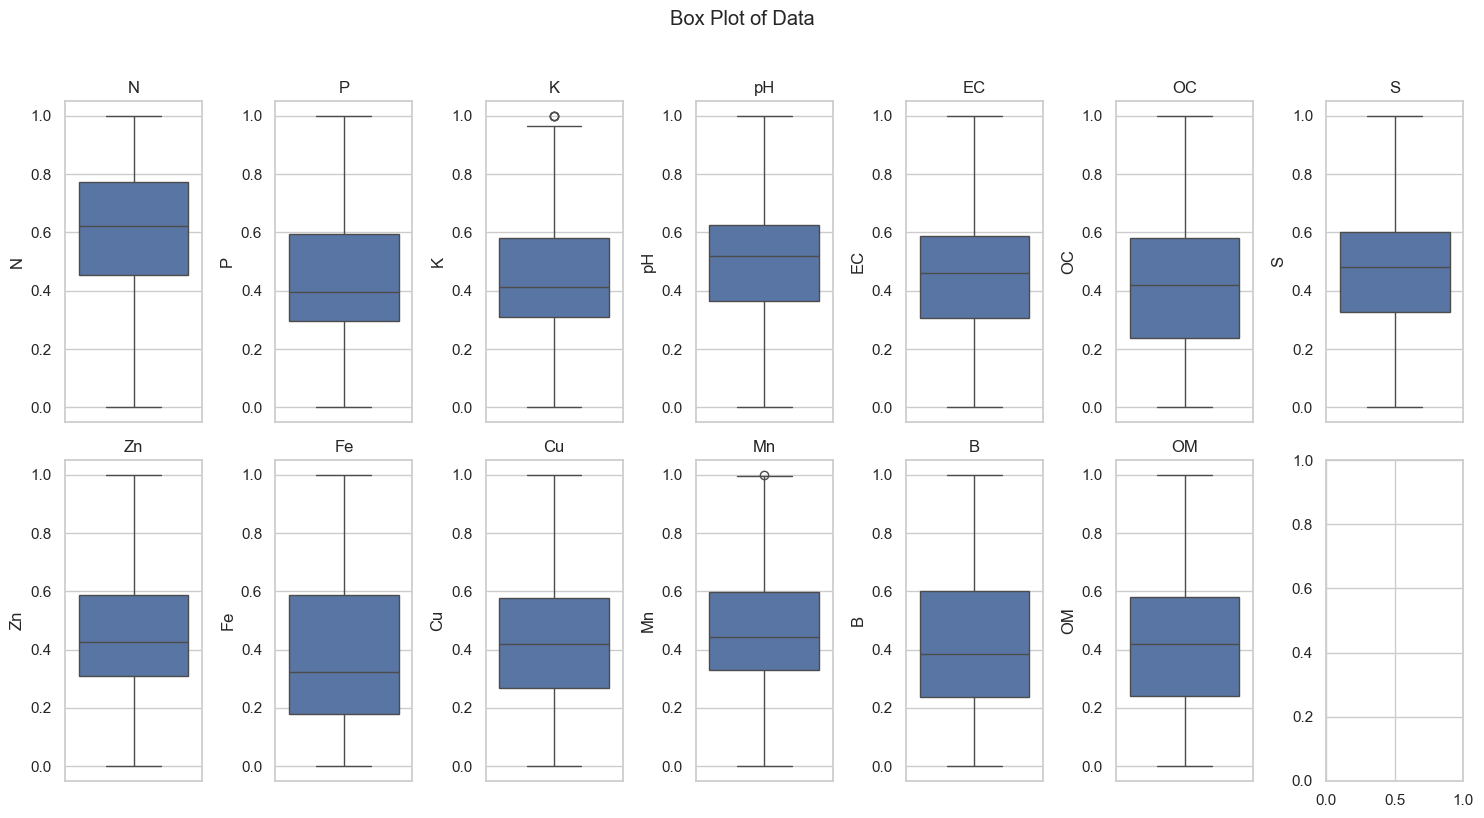

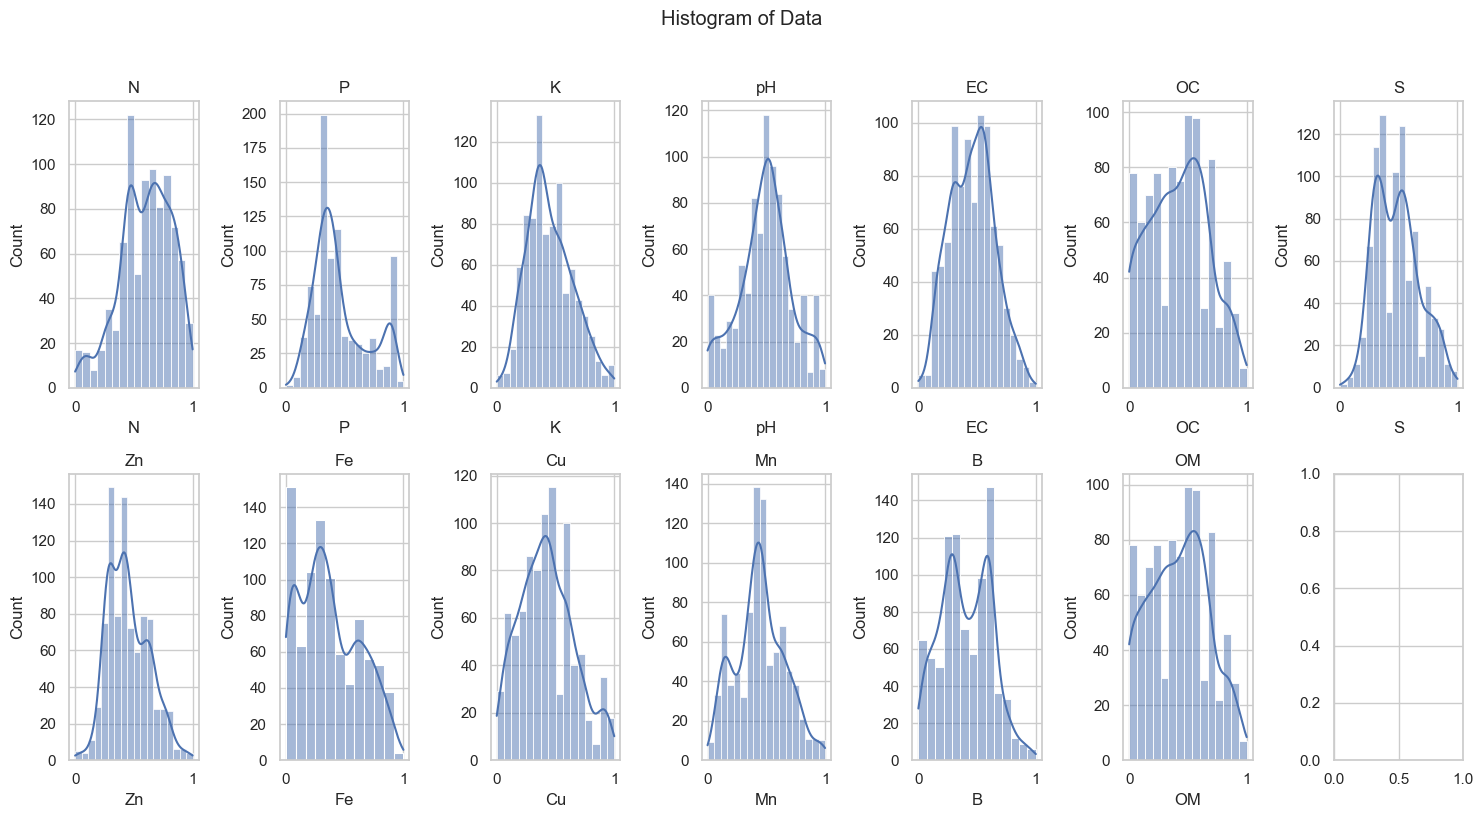

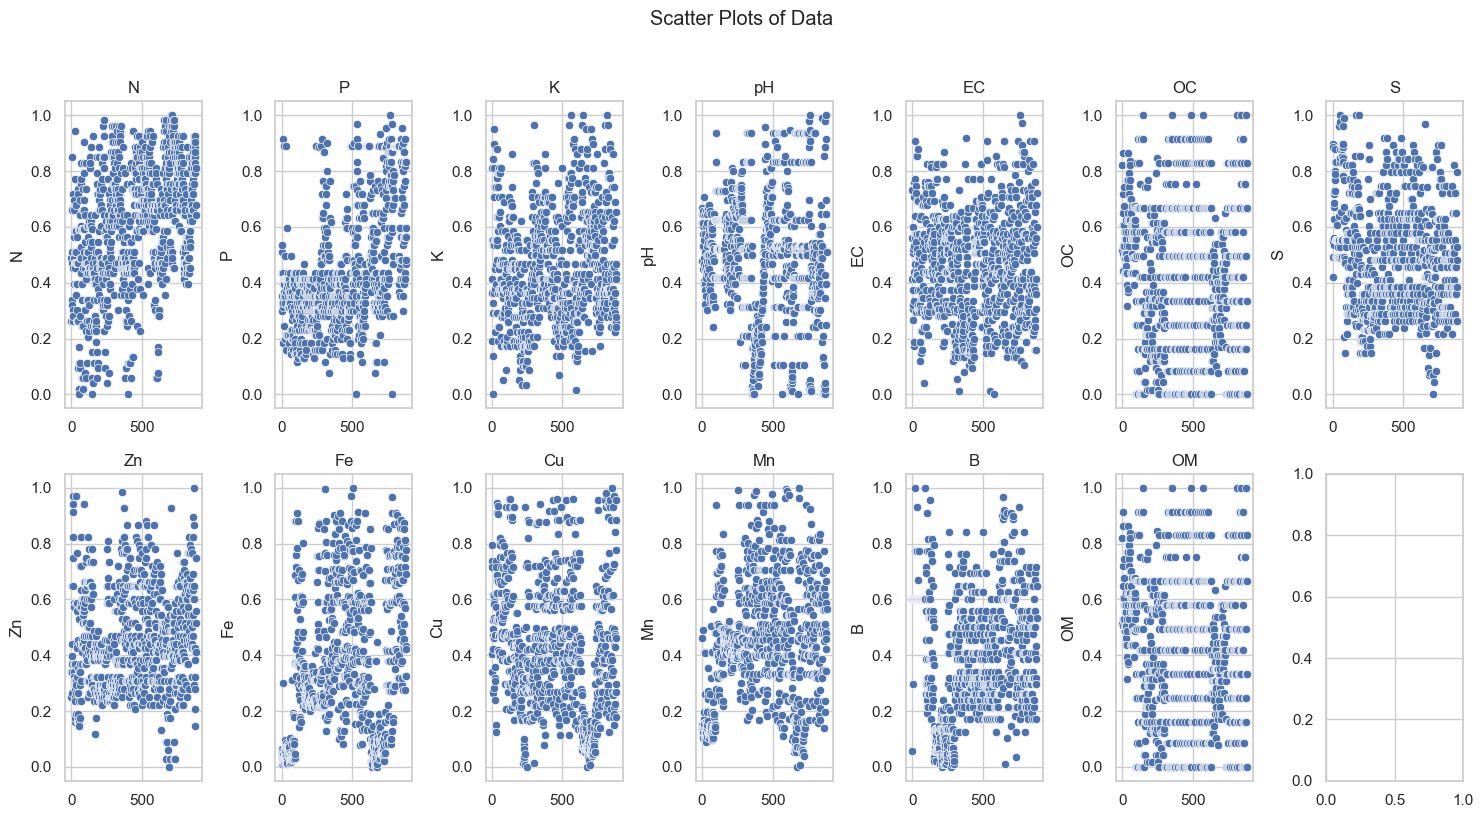

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# 1. Kmeans

100%|██████████| 5/5 [00:31<00:00,  6.30s/it]


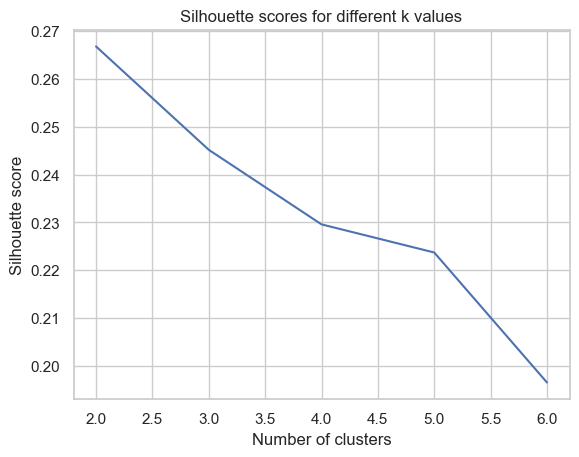

In [8]:
plot_silhouette_scores(X.to_numpy(), k_range=range(2, 7), strategy='cosine')

- we can see that the best number of clusters is 3

In [9]:
kmeans = KMeans(num_clusters=3, max_iter=100)

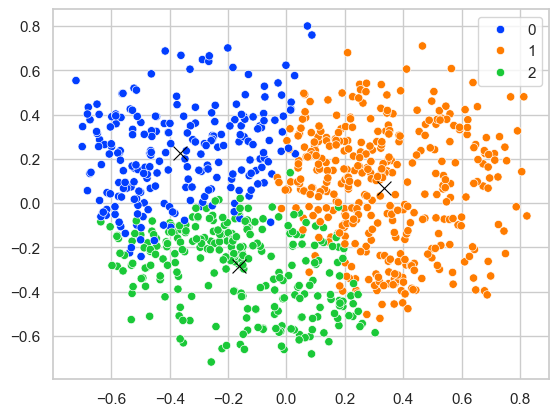

In [10]:
kmeans.fit(X)
kmeans.plot(X)

In [11]:
models = []
for func in ['euclidean', 'manhattan', 'minkowski', 'cosine']:
    models.extend([KMeans(num_clusters=k, max_iter=150, distance_metric=func) for k in range(3, 7)])
models

[KMeans(num_clusters=3, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=cosine_distance, max_iter=150),
 KMeans(num_clusters=4, dist

# Evaluation with different metrics

<h3>1. Silhouette Score </h3>

In [12]:
results = []
for model in models:
    model.fit(X)
    results.append({
        'model': model,
        'silhouette_score': silhouette_score(X.values, model.labels_, strategy=model.distance_metric.__name__.split('_')[0]),
    })
pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False)

,model,silhouette_score
12,"KMeans(num_clusters=3, distance_metric=cosine_...",0.240695
13,"KMeans(num_clusters=4, distance_metric=cosine_...",0.227205
14,"KMeans(num_clusters=5, distance_metric=cosine_...",0.212455
15,"KMeans(num_clusters=6, distance_metric=cosine_...",0.211153
5,"KMeans(num_clusters=4, distance_metric=manhatt...",0.136214
6,"KMeans(num_clusters=5, distance_metric=manhatt...",0.134270
7,"KMeans(num_clusters=6, distance_metric=manhatt...",0.134258
4,"KMeans(num_clusters=3, distance_metric=manhatt...",0.129282
1,"KMeans(num_clusters=4, distance_metric=euclide...",0.124641
10,"KMeans(num_clusters=5, distance_metric=minkows...",0.121165


<h3>2. the usual metrics  </h3>

In [13]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

In [14]:
evaluate(X_test, Y_test, models, get_args(Metric), averages)

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"KMeans(num_clusters=3, distance_metric=euclide...",0.329545,0.358621,0.329545,0.495331,0.343850,0.329545,0.329545,0.291473,0.329545,0.382881,0.679936,0.664773,0.710264
1,"KMeans(num_clusters=4, distance_metric=euclide...",0.255682,0.310714,0.312500,0.417404,0.292139,0.255682,0.255682,0.247086,0.281250,0.305442,0.712634,0.718750,0.700401
2,"KMeans(num_clusters=5, distance_metric=euclide...",0.301136,0.398306,0.445378,0.556913,0.247377,0.301136,0.301136,0.286039,0.359322,0.387851,0.808418,0.812500,0.800253
3,"KMeans(num_clusters=6, distance_metric=euclide...",0.215909,0.309127,0.330435,0.442357,0.150879,0.215909,0.215909,0.202783,0.261168,0.290183,0.774871,0.781250,0.762112
4,"KMeans(num_clusters=3, distance_metric=manhatt...",0.335227,0.347120,0.335227,0.483140,0.311070,0.335227,0.335227,0.285986,0.335227,0.383771,0.678481,0.667614,0.700217
5,"KMeans(num_clusters=4, distance_metric=manhatt...",0.221591,0.327869,0.322314,0.439312,0.267749,0.221591,0.221591,0.234230,0.262626,0.283844,0.766985,0.767045,0.766863
6,"KMeans(num_clusters=5, distance_metric=manhatt...",0.244318,0.349615,0.361345,0.476867,0.247164,0.244318,0.244318,0.246352,0.291525,0.313502,0.783891,0.784091,0.783490
7,"KMeans(num_clusters=6, distance_metric=manhatt...",0.164773,0.309526,0.322222,0.407865,0.190064,0.164773,0.164773,0.193576,0.218045,0.225329,0.815673,0.826705,0.793610
8,"KMeans(num_clusters=3, distance_metric=minkows...",0.323864,0.304261,0.323864,0.410258,0.338651,0.323864,0.323864,0.278128,0.323864,0.354342,0.645438,0.661932,0.612450
9,"KMeans(num_clusters=4, distance_metric=minkows...",0.329545,0.369043,0.453125,0.529378,0.229344,0.329545,0.329545,0.282539,0.381579,0.405720,0.785635,0.801136,0.754634


 we can see that the Kmeans clustering algorithm does not do well on metrics that require the true labels of the data such as ( accuracy, precision, recall, f1_score, roc_auc_score) and that is because the algorithm does not use the labels to cluster the data